<a href="https://colab.research.google.com/github/NETSADOM/CNN-Training-and-Image-Classification/blob/main/CNN_Training_%26_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255

In [4]:
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

In [5]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)

In [6]:
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 82ms/step - accuracy: 0.8664 - loss: 0.4764 - val_accuracy: 0.9838 - val_loss: 0.0574
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.9823 - loss: 0.0591 - val_accuracy: 0.9868 - val_loss: 0.0502
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 35s 84ms/step - accuracy: 0.9885 - loss: 0.0371 - val_accuracy: 0.9890 - val_loss: 0.0398
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 34s 81ms/step - accuracy: 0.9916 - loss: 0.0262 - val_accuracy: 0.9912 - val_loss: 0.0327
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 0.9931 - loss: 0.0219 - val_accuracy: 0.9898 - val_loss: 0.0385
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 85ms/step - accuracy: 0.9953 - loss: 0.0153 - val_accuracy: 0.9907 - val_loss: 0.0381
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 35s 83ms/step - accuracy: 0.9959 - loss: 0.0121 - val_accuracy: 0.9923 - val_loss: 0.0324
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 35s 83ms/step - accuracy: 0.9973 - loss: 0.0091 - 

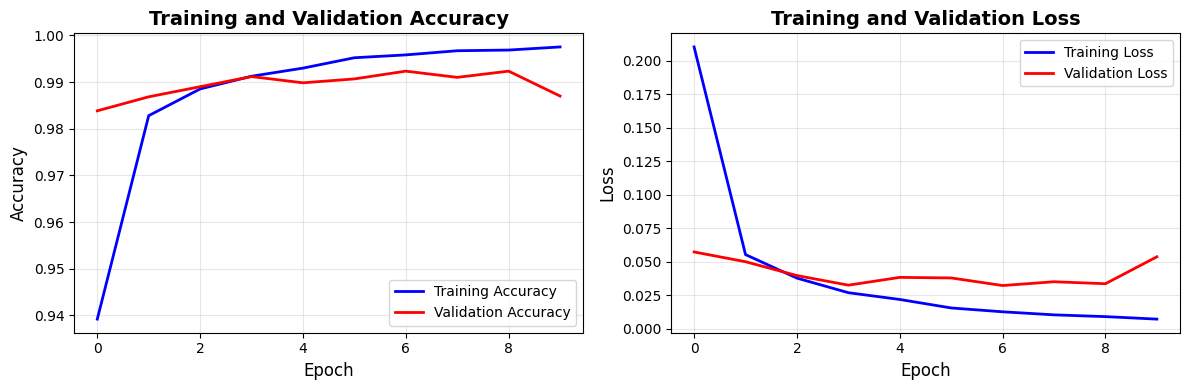

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
ax1.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], 'b-', label='Training Loss', linewidth=2)
ax2.plot(history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"FINAL TEST ACCURACY: {test_accuracy*100:.2f}%")
print(f"FINAL TEST LOSS: {test_loss:.4f}")

FINAL TEST ACCURACY: 98.89%
FINAL TEST LOSS: 0.0401


In [13]:
predictions = model.predict(x_test, verbose=0)

In [14]:
sample_idx = np.random.randint(0, len(x_test))
predicted_digit = np.argmax(predictions[sample_idx])
true_digit = y_test[sample_idx]
confidence = predictions[sample_idx][predicted_digit] * 100

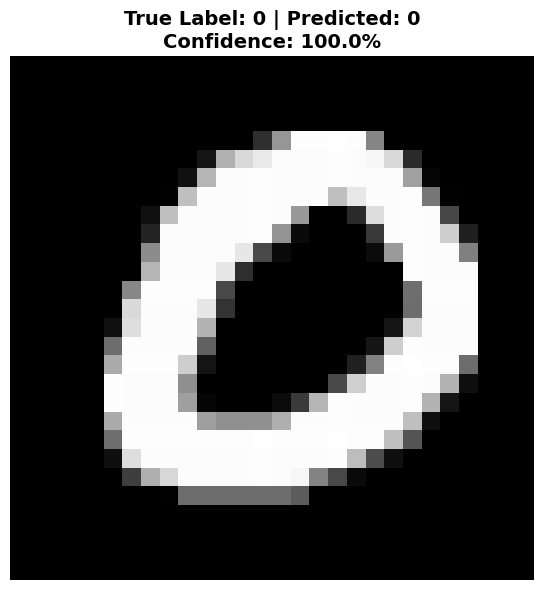

In [16]:
plt.figure(figsize=(6, 6))
plt.imshow(x_test[sample_idx].reshape(28, 28), cmap='gray')
plt.title(f'True Label: {true_digit} | Predicted: {predicted_digit}\nConfidence: {confidence:.1f}%',
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()